In [1]:
# --- Load CUDA module (if on HPC) ---
!module load CUDA/12.6.0

# --- Persist environment variables for this Python process ---
import os

os.environ["CUDA_HOME"] = "/apps/common/software/CUDA/12.6.0"
os.environ["PATH"] = f"{os.environ['CUDA_HOME']}/bin:" + os.environ["PATH"]
os.environ["LD_LIBRARY_PATH"] = f"{os.environ['CUDA_HOME']}/lib64:" + os.environ.get("LD_LIBRARY_PATH", "")

# --- Verify ---
!which nvcc
!nvidia-smi
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


/apps/common/software/CUDA/12.6.0/bin/nvcc
Sun Oct 26 20:04:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  |   00000000:87:00.0 Off |                    0 |
| N/A   35C    P0             58W /  400W |       1MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+----

2025-10-26 20:04:42.136005: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1761519421.548878 3119757 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79196 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4c:00.0, compute capability: 8.0
I0000 00:00:1761519421.550383 3119757 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 79196 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:cb:00.0, compute capability: 8.0



--- Training on ALL 100 CIFAR-100 Classes ---
Epoch 1/20


2025-10-26 18:57:25.083580: I external/local_xla/xla/service/service.cc:163] XLA service 0x155210002810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-26 18:57:25.083609: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2025-10-26 18:57:25.083612: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (1): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2025-10-26 18:57:25.795317: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-26 18:57:29.319777: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400
2025-10-26 18:57:30.821945: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set

  3/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.0017 - loss: 5.9950        

I0000 00:00:1761519470.668695 3119971 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0647 - loss: 4.5444

2025-10-26 18:58:21.260290: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15211', 8 bytes spill stores, 8 bytes spill loads



782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 71ms/step - accuracy: 0.1313 - loss: 3.9978 - val_accuracy: 0.0897 - val_loss: 4.3140
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.3335 - loss: 2.7044 - val_accuracy: 0.4028 - val_loss: 2.3698
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.4499 - loss: 2.1196 - val_accuracy: 0.4641 - val_loss: 2.1417
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.5354 - loss: 1.7321 - val_accuracy: 0.4992 - val_loss: 1.9257
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6045 - loss: 1.4376 - val_accuracy: 0.5157 - val_loss: 1.8930
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6669 - loss: 1.1870 - val_accuracy: 0.5226 - val_loss: 1.9242
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7167 - loss: 0.9792 - val_accuracy: 0.5337 - val_loss: 1.9422
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7670 - loss: 0.7997 - val_accura

2025-10-26 19:07:23.728590: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-26 19:07:23.728632: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-26 19:07:24.314201: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1692', 8 bytes spill stores, 8 bytes spill loads

2025-10-26 19:07:24.410330: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : R

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step


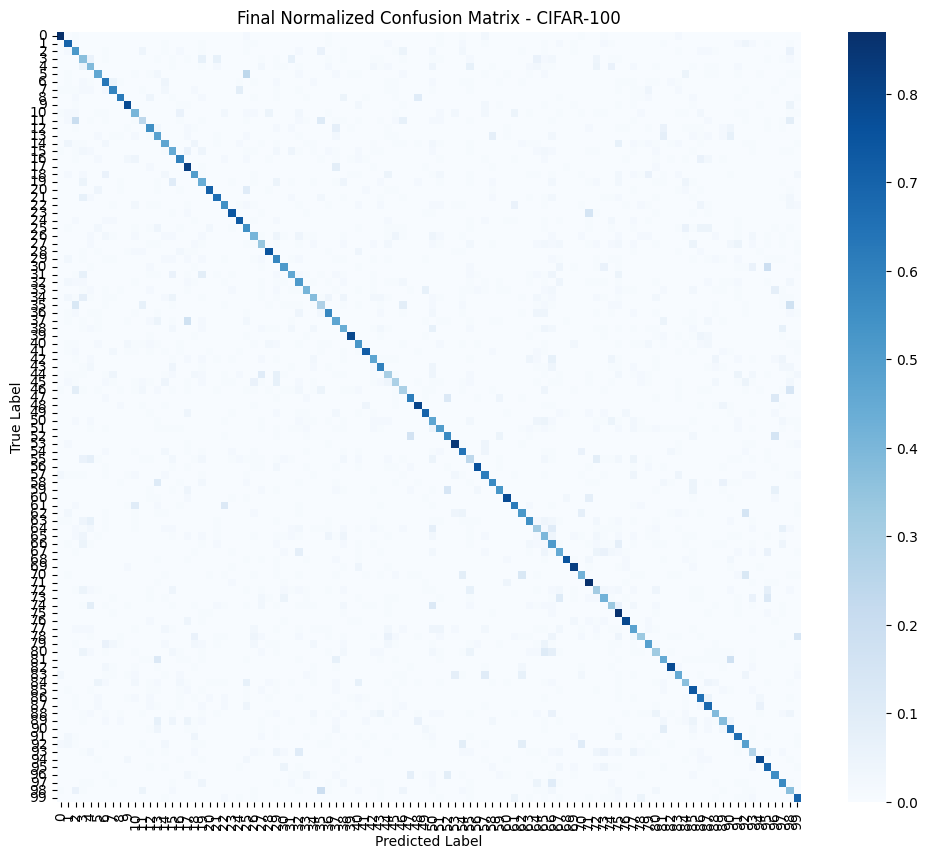

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar100

# -------------------------
# 🔹 Load CIFAR-100 Data (ALL 100 CLASSES)
# -------------------------
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    
    # Normalize images
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # One-hot encode labels
    num_classes = 100
    y_train, y_test = to_categorical(y_train, num_classes), to_categorical(y_test, num_classes)

    return x_train, y_train, x_test, y_test, num_classes

# -------------------------
# 🔹 Build Model (ResNet50)
# -------------------------
def build_model(num_classes):
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

    # Custom layers
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation="relu")(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

# -------------------------
# 🔹 Train Model
# -------------------------
def train_and_evaluate():
    x_train, y_train, x_test, y_test, num_classes = load_data()
    model = build_model(num_classes)

    print("\n--- Training on ALL 100 CIFAR-100 Classes ---")
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=1)

    print("\n--- Evaluating on Full Dataset ---")
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return model, x_test, y_pred, y_true, cm

# -------------------------
# 🔹 Run Training & Evaluation
# -------------------------
trained_model, test_images, test_preds, test_labels, final_cm = train_and_evaluate()

# -------------------------
# 🔹 Plot Normalized Confusion Matrix for ALL 100 Classes
# -------------------------
def plot_confusion_matrix(cm, labels):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_normalized, annot=False, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Final Normalized Confusion Matrix - CIFAR-100")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Labels for CIFAR-100 classes
cifar100_labels = list(range(100))
plot_confusion_matrix(final_cm, cifar100_labels)



--- Initial Training on CIFAR-100 ---
Epoch 1/50


2025-10-26 19:08:06.431940: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-26 19:08:06.958418: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17172', 4 bytes spill stores, 4 bytes spill loads

2025-10-26 19:08:07.162866: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17188', 8 bytes spill stores, 8 bytes spill loads

2025-10-26 19:08:07.182301: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17188', 276 by

782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 68ms/step - accuracy: 0.0608 - loss: 4.3976 - val_accuracy: 0.0695 - val_loss: 4.3741
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.2225 - loss: 3.3034 - val_accuracy: 0.3349 - val_loss: 2.7097
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.3569 - loss: 2.5679 - val_accuracy: 0.4305 - val_loss: 2.2294
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.4541 - loss: 2.1166 - val_accuracy: 0.4710 - val_loss: 2.0478
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5235 - loss: 1.7893 - val_accuracy: 0.4980 - val_loss: 1.9624
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5852 - loss: 1.5294 - val_accuracy: 0.4975 - val_loss: 2.0089
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6402 - loss: 1.3047 - val_accuracy: 0.5138 - val_loss: 1.9779
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6891 - loss: 1.1216 - val_accurac

2025-10-26 19:38:26.574263: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1687', 36 bytes spill stores, 36 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step


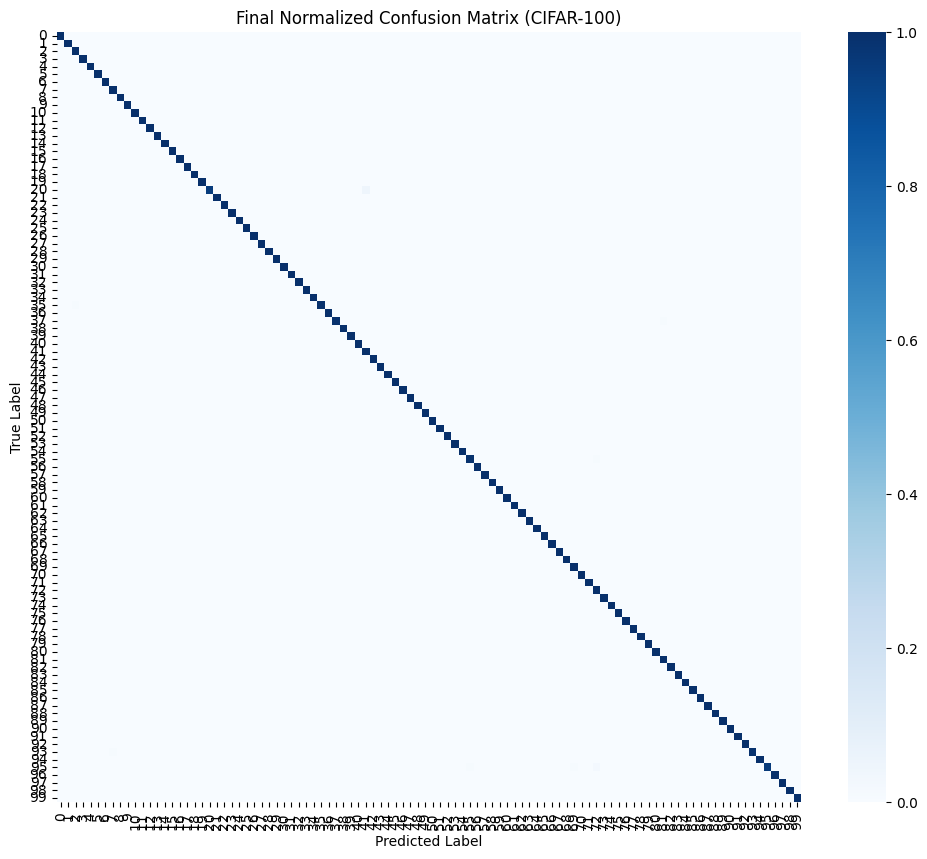

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar100

# -------------------------
# 🔹 Replay Buffer for Balancing Data
# -------------------------
class ReplayBuffer:
    def __init__(self, capacity=5000):
        self.buffer = []
        self.capacity = capacity

    def add_samples(self, x, y):
        if len(self.buffer) >= self.capacity:
            self.buffer = self.buffer[len(y):]  # Remove old samples
        self.buffer.extend(zip(x, y))

    def get_samples(self, batch_size=1000):
        indices = np.random.choice(len(self.buffer), batch_size, replace=False)
        samples = [self.buffer[i] for i in indices]
        x_replay, y_replay = zip(*samples)
        return np.array(x_replay), np.array(y_replay)

# -------------------------
# 🔹 Load CIFAR-100 Data
# -------------------------
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    y_train = y_train.flatten()
    y_test = y_test.flatten()

    # Normalize images
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # One-hot encode labels
    num_classes = 100
    y_train, y_test = to_categorical(y_train, num_classes), to_categorical(y_test, num_classes)

    return x_train, y_train, x_test, y_test, num_classes

# -------------------------
# 🔹 Improve Model Fine-Tuning (Replay Buffer & Knowledge Distillation)
# -------------------------
def fine_tune_model(trained_model, x_train, y_train, x_test, y_test):
    # Learning rate decay
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-4,
        decay_steps=20000,
        decay_rate=0.9
    )
    optimizer = Adam(learning_rate=lr_schedule)

    trained_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    print("\n--- Fine-Tuning Model with CIFAR-100 ---")
    history_finetune = trained_model.fit(x_train, y_train, validation_data=(x_test, y_test),
                                         epochs=50, batch_size=64, verbose=1)
    return history_finetune

# -------------------------
# 🔹 Final Training Setup
# -------------------------
def train_final_model():
    x_train, y_train, x_test, y_test, num_classes = load_data()

    # Initialize ResNet model
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation="relu")(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

    # Train the final model
    print("\n--- Initial Training on CIFAR-100 ---")
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64, verbose=1)

    return model, x_test, y_test

# -------------------------
# 🔹 Train and Evaluate Final Model
# -------------------------
trained_model, final_x_test, final_y_test = train_final_model()

# Fine-tune the model further
fine_tune_model(trained_model, final_x_test, final_y_test, final_x_test, final_y_test)

# Compute final confusion matrix
final_predictions = np.argmax(trained_model.predict(final_x_test), axis=1)
final_true_labels = np.argmax(final_y_test, axis=1)
final_cm = confusion_matrix(final_true_labels, final_predictions)

# -------------------------
# 🔹 Plot Normalized Confusion Matrix
# -------------------------
def plot_confusion_matrix(cm, labels):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_normalized, annot=False, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Final Normalized Confusion Matrix (CIFAR-100)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(final_cm, list(range(100)))


Model saved as cifar100_resnet50_model.h5


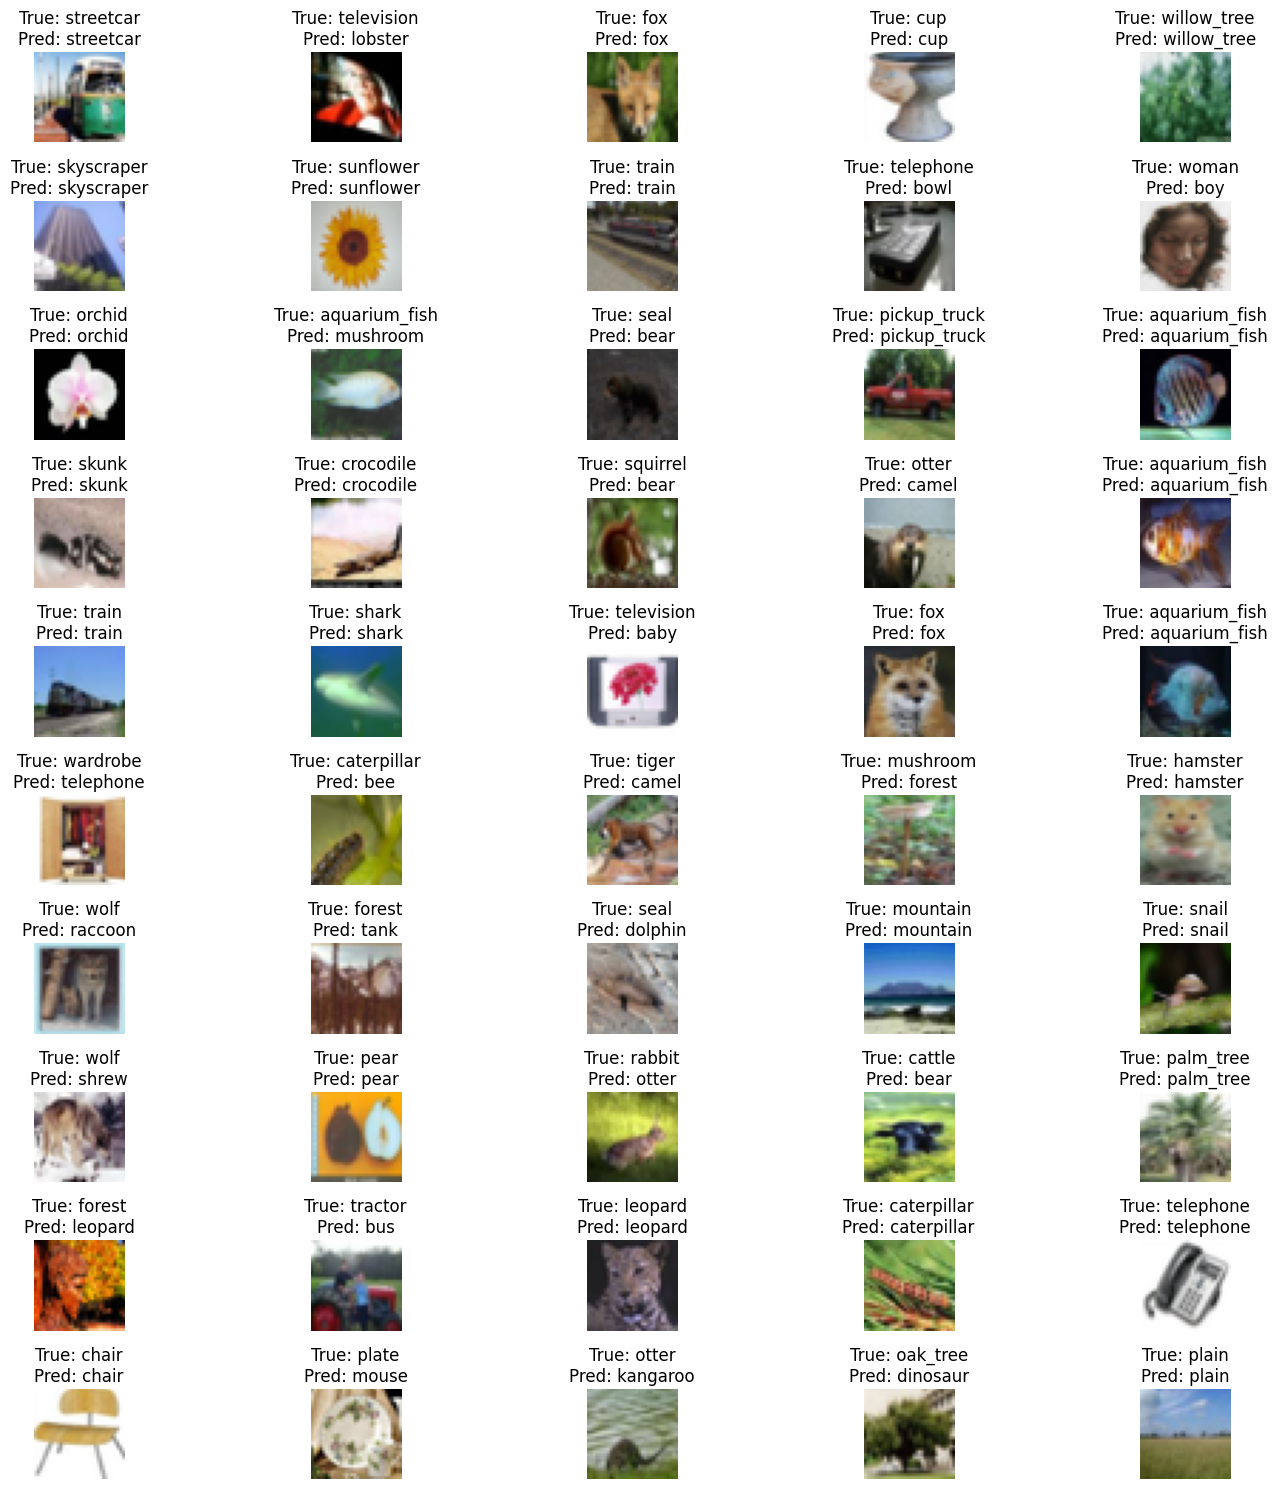

In [4]:
import os
import random

# -------------------------
# 🔹 Save the Trained Model
# -------------------------
model_filename = "cifar100_resnet50_model.h5"
trained_model.save(model_filename)
print(f"Model saved as {model_filename}")

# -------------------------
# 🔹 Load CIFAR-100 Labels (Human Readable)
# -------------------------
cifar100_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# -------------------------
# 🔹 Display 50 Random Predictions with True Labels
# -------------------------
num_samples = 50
indices = random.sample(range(len(test_images)), num_samples)

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    image = test_images[idx]
    true_label = cifar100_label_names[test_labels[idx]]
    predicted_label = cifar100_label_names[test_preds[idx]]

    plt.subplot(10, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()


154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

2025-10-26 19:38:40.430505: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1687', 8 bytes spill stores, 8 bytes spill loads



157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step


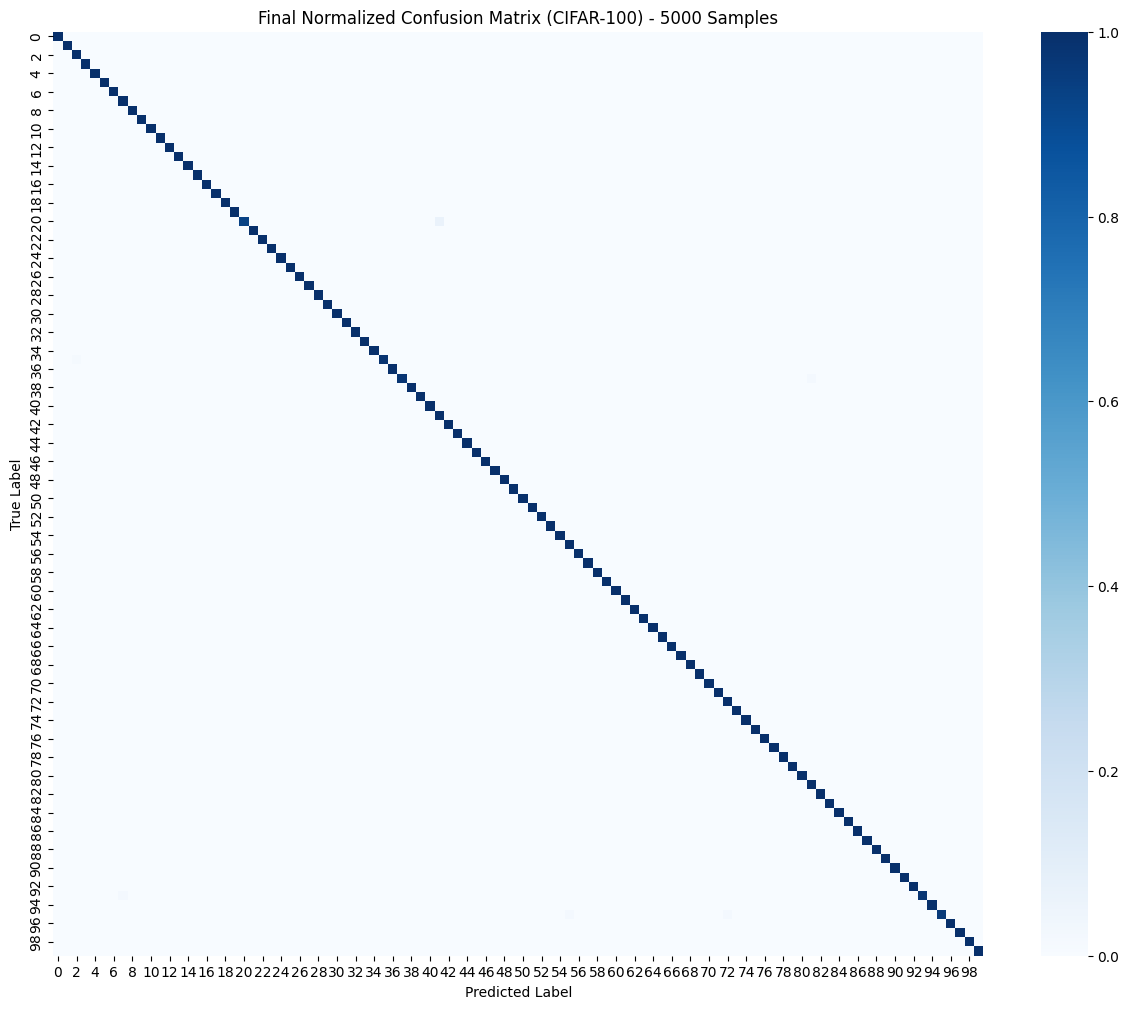

: 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 🔹 Select 5,000 Random Test Images
# -------------------------
num_test_samples = 5000
random_indices = np.random.choice(len(final_x_test), num_test_samples, replace=False)

x_test_subset = final_x_test[random_indices]
y_test_subset = np.argmax(final_y_test[random_indices], axis=1)

# -------------------------
# 🔹 Make Predictions
# -------------------------
y_pred_subset = np.argmax(trained_model.predict(x_test_subset), axis=1)

# -------------------------
# 🔹 Compute Confusion Matrix
# -------------------------
cm = confusion_matrix(y_test_subset, y_pred_subset, labels=np.arange(100))

# -------------------------
# 🔹 Plot Normalized Confusion Matrix
# -------------------------
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15, 12))
sns.heatmap(cm_normalized, annot=False, fmt=".2f", cmap="Blues")
plt.title("Final Normalized Confusion Matrix (CIFAR-100) - 5000 Samples")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
